<img src="https://raw.githubusercontent.com/codecaviar/digital_asset_management/master/assets/bingyune-and-company-logo-6400x3600.png" align="left" width="200" height="auto">

<br/><br/><br/><br/>

# Here's the Kicker: What No One Tells You About Data Wrangling

**BingYune Chen**, Principal Data Scientist<br>
2020-06-05 | 9 minute read

Data is provided by [Kaggle](https://www.kaggle.com/hugomathien/soccer) 
    | Source code is on [Github](https://github.com/codecaviar)

---

The goal of this project is to provide a Quick Guide on the main tasks for data wrangling and exploratory data analysis. Data wrangling is the process of cleaning, transforming, and enriching raw data into a desired format for better decision making in less time. Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

## Table of Contents

1. [**Project Overview**](#overview)
2. [**Data Wrangling**](#data_wrangle)
3. [**Data Exploration**](#data_exploration)  
4. [**Conclusion**](#conclusion)

<a class="anchor" id="overview"></a>
# 1. Project Overview

Data analysis has become a necessary skill in a variety of domains where knowing how to work with data and extract insights can generate significant value. If you ask any data analysts or data scientists about which task they spend most of their time on, the answers will be data cleaning or data wrangling and data munging, and not coding or running a model that uses the data. An essential part of the role is turning messy, incomplete data or data that is too complex to gain real insights into data that is simple, clean and actionable for analysis. The key to fast tracking the entire data wrangling process is knowing which techniques to use and when to use them.


<a class="anchor" id="problem_statement"></a>
## 1.1 Problem Statement

> The goal of this project is to provide a Quick Guide on the main tasks for data wrangling and exploratory data analysis in Python. 

The project makes use of the European Soccer Database on [Kaggle](https://www.kaggle.com/hugomathien/soccer). The database contains data on more than 25,000 matches for the 2008 to 2016 seasons, info on 10,000 players from 11 European Countries, players & team attributes sourced from the EA Sports' FIFA video game series, and detailed match events (e.g. goal types, possession, corner, cross, fouls, etc.). The FIFA series and all FIFA assets are the property of EA Sports. 

The project also uses the open source tool Python and Pandas library to demonstrate essential data wrangling techniques. The examples deal with some of the most common data formats and their transformations. The Pandas library contains dataframes that are very similar to any other tool or language that is used for data analysis (e.g. Excel and SQL). Python code can be used to easily manipulate the rows and columns of these dataframes.

In [1]:
# Import libraries for pandas, numpy, matplotlib, sklearn, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

import sqlite3
import seaborn as sb

The following SQLite file was downloaded from the European Soccer Database on [Kaggle](https://www.kaggle.com/hugomathien/soccer). SQLite is a specific implementation of SQL, which is a conceptual language to work with data stored in databases. SQLite is ultra-lightweight in setup, administration, and required resource. Most SQL languages share all of the capabilities from SQLite. The differences are usually in performance and advanced analytical functions (e.g. PostgreSQL). The following Python code will use SQL queries to pull data from the SQLite database, manipulate it, sort it, and extract the desired insights. 

In [2]:
# Create a simple function to read SQL query commands
def sqlpd(sql_query):
    """
    Read a string of SQL commands to query a SQLite database
    and output a pandas dataframe of the resulting query
    """
    # Connect to SQLite database
    sqlite_file = './data/european_football.sqlite'
    con = sqlite3.connect(sqlite_file)
    
    # Use pandas to pass sql query using connection from SQLite3
    df = pd.read_sql_query(sql_query, con)
    
    # Close the SQLite database
    con.close()

    # Show the resulting DataFrame
    return df

# Check connection to database with a SQL query for all tables
query = """
SELECT name 
FROM sqlite_master
WHERE type='table';
"""
all_tables = sqlpd(query)

all_tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


<a class="anchor" id="data_wrangle"></a>
# 2. Data Wrangling

In this section, the project examines the various tables imported from the European Soccer Database to understand the structure and distribution of the data. Additionally, the project will frame several research questions to guide the analysis.  

<a class="anchor" id="discovery"></a>
## 2.1 General Discovery 

Now a days, it seems like the amount of content available on any given topic is as endless and vast as the oceans. The information is often disparate and complicated. Plus, there's a ton of it out there. Before we can dive deeply into data wrangling, we must first better discover what is in our dataset, which will inform us on how to best analyze it. 

In [3]:
# Create a Pandas dataframe for Team table
query = """
SELECT * 
FROM Team;
"""
df_teams = sqlpd(query)

df_teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [4]:
# Let's also check the data type and null values of each column
# Reminder: "object" is a Pandas data type that is used for text or mixed 
# numeric and non-numerical values

df_teams.info() # team_fifa_api_id is a foreign key and missing 11 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [5]:
# Create a dataframe for Team_Attributes table, check data types and null values
query = """
SELECT *
FROM Team_Attributes;
"""
df_team_att = sqlpd(query)

df_team_att.head();
df_team_att.info() # column buildUpPlayDribbling has 969 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [6]:
# Create a dataframe for Match table, check data types and null values
query = """
SELECT *
FROM Match;
"""
df_match = sqlpd(query)

df_match.head(); # Match table contains 115 columns, need to restructure
df_match.info(); # Data types include float64, int64, object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [7]:
# Create a dataframe for Player table, check data types and null values
query = """
SELECT *
FROM Player;
"""
df_players = sqlpd(query)

df_players.head();
df_players.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [8]:
# Create a dataframe for Player_Attributes table, check data types and null values

query = """
SELECT *
FROM Player_Attributes;
"""
df_player_att = sqlpd(query)

df_player_att.head();
df_player_att.info() # several columns have missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

<a class="anchor" id="questions"></a>
### 2.1.1 Research Questions 

Based on the information from our lite data discovery, it would be interesting to explore the following questions with this dataset:

* Which teams are the most effective based on results?
* How do team attributes differ for the most effective teams compared to all other teams?
* How do player attributes differ for the most effective players compared to all other players?

The questions above help to frame the exploratory data analysis for this dataset. We'll start with a review of the key elements of data wrangling.

<a class="anchor" id="cleaning"></a>
## 2.2 Data Cleaning

*Data cleaning* is the process of detecting and/or removing corrupt or inaccurate records from a dataset. An initial round of data cleaning on our dataframe will give us the bare minimum we need to start exploring our data. Some essential data cleaning tasks include sorting the data, filtering to the desired subset of data, converting data types, deduplicating data, and addressing missing or invalid data. 

Missing data can be especially challenging because we have to decide whether or not we want to keep the observations with missing data. An essential question to ask ourselves is how random are the missing values? Also, we must keep in mind that deleting a whole row because it has one missing value, might be a poor decision and lead to information loss. Similarly, keeping an entire row of missing values because it has a meaningful missing value might also be a poor decision. Instead of simply removing missing data, we may also want to consider replacing missing values with common strategies. The four main strategies are mean, most_frequent, median, and a constant. Other popular ways to replace missing data involve the use of clustering algorithms or interpolating the values through a wide range of interpolation methods. Both techniques are not implemented in the Pandas library and won't be discussed here.

For the European Football dataset, null values are removed and standard data formatting is implemented, ultimately increasing data quality. Examples of additional validation steps include ensuring uniform distribution of attributes that should be distributed normally and confirming the accuracy of fields through a check across data. Through data cleaning, we know which columns in our database are incomplete, incorrect, inaccurate, or irrelevant. Data cleaning is the best starting point for data wrangling because having the data stored as the correct data types and easy-to-reference names will make it easier to manipulate in future next steps. 

In [9]:
# Explore team dataframe and remove duplicates
df_teams.info() # team_fifa_api_id is a foreign key and missing 11 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [10]:
# Check team_api_id for duplicates since this foreign key links to the 
# other tables we created above
df_teams[df_teams.duplicated(['team_api_id'])] # no duplicates

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name


In [11]:
# Explore team attributes dataframe and remove duplicates
df_team_att.info() # column buildUpPlayDribbling has 969 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [12]:
# The column buildUpPlayDribbling has 969 null values, but column
# buildUpPlaDribblingClass has no null values, why?
df_dribbling = df_team_att[['buildUpPlayDribblingClass', 
                            'buildUpPlayDribbling']]

df_dribbling.isnull().groupby(
    df_dribbling['buildUpPlayDribblingClass']).sum()

,buildUpPlayDribblingClass,buildUpPlayDribbling
buildUpPlayDribblingClass,,
Little,0,969
Lots,0,0
Normal,0,0


In [13]:
# Let's investigate what's going on with the values for this Class
df_dribbling_little = df_dribbling[
    df_dribbling.buildUpPlayDribblingClass == 'Little']

df_dribbling_little['buildUpPlayDribbling'].describe()

count    35.000000
mean     30.485714
std       2.489642
min      24.000000
25%      29.000000
50%      32.000000
75%      32.000000
max      33.000000
Name: buildUpPlayDribbling, dtype: float64

The values for buildUpPlayDribbling where buildUpPlayDribblingClass is equal to 'Little' has a min of 24, a max of 33, and a mean of about 30. Since all null values are in the buildUpPlayDribblingClass Little, we can safely handle the null values in the column buildUpPlayDribbling by changing the null values to the mean value.

In [14]:
# Replace null values in buildUpPlayDribbling
df_team_att['buildUpPlayDribbling'].fillna(30.485714, inplace = True)

# Check if all null values are replaced 
df_team_att.info() # no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            1458 non-null   float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [15]:
# Check if all teams have records in the Team_Attributes table
df_team_att.team_api_id.value_counts().describe()

count    288.000000
mean       5.062500
std        1.540255
min        1.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: team_api_id, dtype: float64

There are 299 teams, but only 288 of the teams have data in the Team_Attributes table. Unfortunately, the number of records in the Team_Attributes table is not the same for all 288 teams. The number of data points range from 1 to 6. 

In [16]:
# Explore Players and remove duplicates
df_players.info() # player_api_id is a foreign key, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [17]:
# Check player_api_id for duplicates since this foreign key links to the 
# other tables we created above

df_players[df_players.duplicated(['player_api_id'])] # no duplicates

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


<a class="anchor" id="transformation"></a>
## 2.3 Data Transformation

*Data transformation* means organizing the data, which is necessary because raw data comes in many different shapes and sizes. We focus on changing our data's structure to facilitate our downstream analysis. For example, changes to which data goes along the rows and which goes down the columns might make for easier computation and analysis. Alternatively, a single column might be separated into several columns (e.g. feature engineering with categorical data). Most data is also either already in a wide or long data format. 

<br/>
<img src="assets/fig1-wide-long-data-format.jpeg" align="center" width="auto" height="auto"/> 
<p style="text-align: center;">Fig.1. Data Formats, wide data formats are more common for data analysis</p>

With a wide data format, variables have their own columns, and each row represents an observation of those variables. The format makes it easy for us to compare variables across observations, get summary statistics, perform operations, and present our data. Unfortunately, some data visualizations do not work with this data format because they may rely on the long format to split, size, and/or color the plot content.

On the other hand, a long data format will have a row for each observation of a variable. For instance, if we have three variables being measured daily, we have three rows for each day we record observations. A long data format is often considered poor design because each column should be its own data type and have a singular meaning.

The Match table will need to be transformed in order for us to look at the results of each match (wins/losses/draws) and identify players in each team per season. 

In [18]:
# Build a dataframe with only scores to assess wins/draws/losses
# for matches for each team

query = """
SELECT id, country_id, league_id, season, match_api_id, home_team_api_id,
    away_team_api_id, home_team_goal, away_team_goal
FROM Match;
"""
df_match_score = sqlpd(query)

df_match_score.head();
df_match_score.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   match_api_id      25979 non-null  int64 
 5   home_team_api_id  25979 non-null  int64 
 6   away_team_api_id  25979 non-null  int64 
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ MB


In [19]:
# Explore Match Score and remove duplicates
df_match_score.info() # match_api_id is a foreign key, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   match_api_id      25979 non-null  int64 
 5   home_team_api_id  25979 non-null  int64 
 6   away_team_api_id  25979 non-null  int64 
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ MB


In [20]:
# Check match_api_id for duplicates since this foreign key links to the 
# other tables we created above
df_match_score[df_match_score.duplicated(['match_api_id'])] # no duplicates

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal


In [21]:
# Build a dataframe with players per match
query = """
SELECT id, season, home_team_api_id, away_team_api_id, home_player_1, 
    home_player_2, home_player_3, home_player_4, home_player_5, 
    home_player_6, home_player_7, home_player_8, home_player_9, 
    home_player_10, home_player_11, away_player_1, away_player_2, 
    away_player_3, away_player_4, away_player_5, away_player_6, 
    away_player_7, away_player_8, away_player_9, away_player_10, 
    away_player_11 
FROM Match;
"""
df_match_player = sqlpd(query)

df_match_player.head();
df_match_player.info() # missing values for each home and away player

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   season            25979 non-null  object 
 2   home_team_api_id  25979 non-null  int64  
 3   away_team_api_id  25979 non-null  int64  
 4   home_player_1     24755 non-null  float64
 5   home_player_2     24664 non-null  float64
 6   home_player_3     24698 non-null  float64
 7   home_player_4     24656 non-null  float64
 8   home_player_5     24663 non-null  float64
 9   home_player_6     24654 non-null  float64
 10  home_player_7     24752 non-null  float64
 11  home_player_8     24670 non-null  float64
 12  home_player_9     24706 non-null  float64
 13  home_player_10    24543 non-null  float64
 14  home_player_11    24424 non-null  float64
 15  away_player_1     24745 non-null  float64
 16  away_player_2     24701 non-null  float6

In [22]:
# We anticipate the players in each match and season to vary
df_match_player.info() # OK for null values for players per match

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   season            25979 non-null  object 
 2   home_team_api_id  25979 non-null  int64  
 3   away_team_api_id  25979 non-null  int64  
 4   home_player_1     24755 non-null  float64
 5   home_player_2     24664 non-null  float64
 6   home_player_3     24698 non-null  float64
 7   home_player_4     24656 non-null  float64
 8   home_player_5     24663 non-null  float64
 9   home_player_6     24654 non-null  float64
 10  home_player_7     24752 non-null  float64
 11  home_player_8     24670 non-null  float64
 12  home_player_9     24706 non-null  float64
 13  home_player_10    24543 non-null  float64
 14  home_player_11    24424 non-null  float64
 15  away_player_1     24745 non-null  float64
 16  away_player_2     24701 non-null  float6

We expect a different number of missing values for each home player and away player because each player did not play in every game for every season. In order to explore players in each team per season, we need to restructure the match table a bit more.  

In [23]:
# Build a dataframe of players for home teams per season
temp_cols = ['home_team_api_id', 'season', 'home_player_1', 
             'home_player_2', 'home_player_3', 'home_player_4', 
             'home_player_5', 'home_player_6', 'home_player_7', 
             'home_player_8', 'home_player_9', 'home_player_10', 
             'home_player_11']

df_player_home_season = df_match_player[temp_cols]

# Pivot the table and drop the null values for players
df_player_home_season = pd.melt(
    df_player_home_season, id_vars = ['home_team_api_id', 'season'], 
    var_name = 'position', value_name = 'player').dropna()

# Change column name for home_team_api_id
df_player_home_season.rename(
    columns = {'home_team_api_id': 'team_api_id'}, inplace = True)

# Drop column position
df_player_home_season.drop(columns = ['position'], inplace = True)

# Since players play more than one match in a season we need 
# to remove duplicates

df_player_home_season = df_player_home_season.drop_duplicates(
    subset = ['team_api_id', 'season', 'player'], keep = 'first')

df_player_home_season.shape # check the size of the new dataframe

(33086, 3)

In [24]:
# Build a dataframe of players for away teams per season
temp_cols = ['away_team_api_id', 'season', 'away_player_1', 
             'away_player_2', 'away_player_3', 'away_player_4', 
             'away_player_5', 'away_player_6', 'away_player_7', 
             'away_player_8', 'away_player_9', 'away_player_10', 
             'away_player_11']

df_player_away_season = df_match_player[temp_cols]

# Pivot the table and drop the null values for players
df_player_away_season = pd.melt(
    df_player_away_season, id_vars = ['away_team_api_id', 'season'], 
    var_name = 'position', value_name = 'player').dropna()

# Change column name for away_team_api_id
df_player_away_season.rename(
    columns = {'away_team_api_id': 'team_api_id'}, inplace = True)

# Drop column position
df_player_away_season.drop(columns = ['position'], inplace = True)

# Since players play more than one match in a season we need 
# to remove duplicates
df_player_away_season = df_player_away_season.drop_duplicates(
    subset = ['team_api_id', 'season', 'player'], keep = 'first')

df_player_away_season.shape # check the size of the new dataframe

(33432, 3)

In [25]:
# Combine the palyer_home_season and player_away_season dataframes 
# to get a list of all players for all teams and all seasons
df_players_team_season = df_player_home_season.append(
    df_player_away_season, ignore_index = True)

# Remove duplicate players in the new dataframe
df_players_team_season = df_players_team_season.drop_duplicates(
    subset = ['team_api_id', 'season', 'player'], keep = 'first')

df_players_team_season.head();
df_players_team_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35002 entries, 0 to 66517
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_api_id  35002 non-null  int64  
 1   season       35002 non-null  object 
 2   player       35002 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


<a class="anchor" id="enriching"></a>
## 2.4 Data Enriching

*Data enriching* is the process of combining first party data from internal sources with disparate data from other internal systems or third party data from external sources. We can either merge new data with the original data (by appending new rows or columns) or use the original data to create new data (apply functions to the existing data columns). Enriched data is a valuable asset for any organization because it becomes more useful and insightful. For instance, if the database was time series data, we may consider resampling and aggregating at specific intervals. Alternatively, if we have continuous data or categorical data with many distinct values, we may consider binning the data into specific range buckets. The data cleaning and data transformation steps already set up the dataset for exploratory data analysis, so there is no need for data enriching at this time. 

<a class="anchor" id="data_exploration"></a>
# 3. Exploratory Data Analysis

Data exploration involves a combination of manual methods and automated tools such as data visualizations, charts, and initial summary statistics. The process makes deeper analysis easier because it can help manage a massive set of information. By taking the time to perform a real exploration of our data along with data isualization tools, we can find correlations, patterns, and determine if a certain question is worth researching, or if the information is less usable.

### 3.1 Which teams are the most effective based on results?

In a football league such as Premier League in England or La Liga in Spain, each team plays each other team twice during the regular season. For example, if there are 20 teams in the league, each team has to play 38 matches. For each match, the team is awarded 3 points for a win, 1 point of a draw, and 0 points for a lost. The maximum points a team could earn would be 38 * 3 = 114, which means this team won all 38 matches. If two teams have the same number of match points (not goals), the league would take the goals scored and goals received into account.   

In [26]:
# Count match points based on matches and sum for each team per season
df_match_score.loc[df_match_score['home_team_goal']
                   - df_match_score['away_team_goal'] > 0, 
                  'points_home_team'] = 3

df_match_score.loc[df_match_score['home_team_goal']
                  - df_match_score['away_team_goal'] == 0,
                  'points_home_team'] = 1

df_match_score.loc[df_match_score['home_team_goal']
                  - df_match_score['away_team_goal'] < 0,
                  'points_home_team'] = 0

df_match_score.loc[df_match_score['home_team_goal']
                   - df_match_score['away_team_goal'] > 0, 
                  'points_away_team'] = 0

df_match_score.loc[df_match_score['home_team_goal']
                  - df_match_score['away_team_goal'] == 0,
                  'points_away_team'] = 1

df_match_score.loc[df_match_score['home_team_goal']
                  - df_match_score['away_team_goal'] < 0,
                  'points_away_team'] = 3

df_match_score.head() # includes new columns we created above

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,points_home_team,points_away_team
0,1,1,1,2008/2009,492473,9987,9993,1,1,1.0,1.0
1,2,1,1,2008/2009,492474,10000,9994,0,0,1.0,1.0
2,3,1,1,2008/2009,492475,9984,8635,0,3,0.0,3.0
3,4,1,1,2008/2009,492476,9991,9998,5,0,3.0,0.0
4,5,1,1,2008/2009,492477,7947,9985,1,3,0.0,3.0


In [27]:
# Sum total match points for home team
df_points_season_home = df_match_score.groupby(
    ['home_team_api_id','season'])['points_home_team'].agg(
    ['sum', 'count']).reset_index()

# Rename columns of new dataframe
df_points_season_home.columns = ['team_api_id', 'season', 
                                 'points', 'matches']
df_points_season_home.head()

,team_api_id,season,points,matches
0,1601,2008/2009,21.0,15
1,1601,2009/2010,32.0,15
2,1601,2010/2011,23.0,15
3,1601,2011/2012,30.0,15
4,1601,2012/2013,17.0,15


In [28]:
# Sum total match points for away team
df_points_season_away = df_match_score.groupby(
    ['away_team_api_id','season'])['points_away_team'].agg(
    ['sum', 'count']).reset_index()

# Rename columns of new dataframe
df_points_season_away.columns = ['team_api_id', 'season', 
                                 'points', 'matches']
df_points_season_away.head()

,team_api_id,season,points,matches
0,1601,2008/2009,13.0,15
1,1601,2009/2010,21.0,15
2,1601,2010/2011,15.0,15
3,1601,2011/2012,25.0,15
4,1601,2012/2013,14.0,15


In [29]:
# Combine dataframes for home and away teams
df_points_season_all = pd.concat([df_points_season_home,
                                 df_points_season_away])

# Sum points and matches for each team as home_team and away_team
df_team_season_points = df_points_season_all.groupby(
    ['team_api_id', 'season']).sum().reset_index()

# Add column of points per match to calculate average points
df_team_season_points['points_per_match'] = (
    df_team_season_points['points'] / df_team_season_points['matches'])

# Add column for season start and end date
# Assume season starts on July 1st and ends on June 30th of each year
df_team_season_points['season_start'] = (
    df_team_season_points['season']).str[:4] + '-07-01'
df_team_season_points['season_end'] = (
    df_team_season_points['season']).str[5:] + '-06-30'

# Add team names
df_team_name_season_points = pd.merge(
    df_teams[['team_api_id', 'team_long_name']], df_team_season_points,
    how = 'right', on = 'team_api_id')

# Sort descending order by points_per_match to see the most effective
df_team_name_season_points.sort_values(by = 'points_per_match',
                                       ascending = False).head(10)

,team_api_id,team_long_name,season,points,matches,points_per_match,season_start,season_end
807,9773,FC Porto,2010/2011,84.0,30,2.800000,2010-07-01,2011-06-30
1057,9885,Juventus,2013/2014,102.0,38,2.684211,2013-07-01,2014-06-30
894,9823,FC Bayern Munich,2012/2013,91.0,34,2.676471,2012-07-01,2013-06-30
895,9823,FC Bayern Munich,2013/2014,90.0,34,2.647059,2013-07-01,2014-06-30
607,8633,Real Madrid CF,2011/2012,100.0,38,2.631579,2011-07-01,2012-06-30
616,8634,FC Barcelona,2012/2013,100.0,38,2.631579,2012-07-01,2013-06-30
1107,9925,Celtic,2013/2014,99.0,38,2.605263,2013-07-01,2014-06-30
613,8634,FC Barcelona,2009/2010,99.0,38,2.605263,2009-07-01,2010-06-30
809,9773,FC Porto,2012/2013,78.0,30,2.600000,2012-07-01,2013-06-30
649,8640,PSV,2014/2015,88.0,34,2.588235,2014-07-01,2015-06-30


In [30]:
# Sort ascending order by points_per_match to see the least effective
df_team_name_season_points.sort_values(by = 'points_per_match',
                                       ascending = True).head(10)

,team_api_id,team_long_name,season,points,matches,points_per_match,season_start,season_end
413,8525,Willem II,2010/2011,15.0,34,0.441176,2010-07-01,2011-06-30
1343,10219,RKC Waalwijk,2009/2010,15.0,34,0.441176,2009-07-01,2010-06-30
1417,10252,Aston Villa,2015/2016,17.0,38,0.447368,2015-07-01,2016-06-30
1160,9984,KSV Cercle Brugge,2012/2013,14.0,30,0.466667,2012-07-01,2013-06-30
1388,10242,ES Troyes AC,2015/2016,18.0,38,0.473684,2015-07-01,2016-06-30
112,7869,Córdoba CF,2014/2015,20.0,38,0.526316,2014-07-01,2015-06-30
1472,108893,AC Arles-Avignon,2010/2011,20.0,38,0.526316,2010-07-01,2011-06-30
82,7788,SC Cambuur,2015/2016,18.0,34,0.529412,2015-07-01,2016-06-30
1212,9998,RAEC Mons,2008/2009,19.0,34,0.558824,2008-07-01,2009-06-30
1340,10218,Excelsior,2011/2012,19.0,34,0.558824,2011-07-01,2012-06-30


Based on these data we can say that team_api_id 9773 (FC Porto) in season 2010/2011 was most effective with 2.8 points per match. This is in line with the fact that FC Porto had a record season where they ended the Portuguese League unbeaten and 21 points ahead of the team in second place, had 16 consecutive wins, from December 6, 2010, to May 1, 2011. It was an extraordinary year for FC Porto, with four trophies being won, including a Europa League.

Team Willem II 2010/2011 (team_api_id 8525) and RKC Waalwijk 2009/2010 (team_api_id 10219) were least effective with just 0.441176 points per match. This is confirmed in the fact that Willem II and RKC Waalwijk were at the bottom of the Eredivisie League the whole season and got relegated from the Eredivisie in the mentioned seasons.

### 3.2 How do team attributes differ for the most effective teams compared to all other teams in our dataset?

In [31]:
# Explore distribution of records in df_team_season_points
df_team_season_points[['points', 'matches', 'points_per_match']
                     ].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9])

,points,matches,points_per_match
count,1481.000000,1481.000000,1481.000000
mean,48.170831,35.083052,1.373105
std,16.048654,3.570599,0.434623
min,4.000000,6.000000,0.441176
10%,30.000000,30.000000,0.882353
25%,37.000000,34.000000,1.078947
50%,45.000000,36.000000,1.289474
75%,57.000000,38.000000,1.631579
90%,71.000000,38.000000,2.029412
max,102.000000,38.000000,2.800000


The top 10% of teams have a score of 2.029412 points per match. We can compare the team attributes of the 10% of teams vs the other 90% of teams.

In [32]:
# Identify teams in the top 10% of points per match
df_team_top10 = df_team_season_points[
    df_team_season_points['points_per_match'] > 2.029412]

# Select team attributes for the top 10% of teams
df_team_att_filtered10 = pd.merge(df_team_top10, df_team_att,
                               on = 'team_api_id', how = 'left')

# Filter team attributes by season
df_team_att_top10 = df_team_att_filtered10.loc[
    df_team_att_filtered10.date.between(
        df_team_att_filtered10.season_start,
        df_team_att_filtered10.season_end)]

df_team_att_top10.describe()

,team_api_id,points,matches,points_per_match,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,9233.697248,80.422018,35.211009,2.282636,522.431193,283.733945,51.422018,35.967234,43.146789,55.018349,54.844037,57.403670,52.174312,52.229358,54.229358
std,962.311901,9.977097,3.200328,0.180457,415.854506,438.860702,12.711393,10.484748,10.030348,11.808645,11.764018,11.700838,11.639527,10.690627,10.366107
min,2182.000000,57.000000,28.000000,2.033333,17.000000,1.000000,24.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,30.000000,30.000000
25%,8633.000000,74.000000,34.000000,2.133333,146.000000,48.000000,42.000000,30.485714,35.000000,46.000000,50.000000,50.000000,45.000000,46.000000,50.000000
50%,9772.000000,81.000000,36.000000,2.263158,324.000000,231.000000,52.000000,30.485714,45.000000,56.000000,56.000000,60.000000,52.000000,53.000000,55.000000
75%,9875.000000,87.000000,38.000000,2.421053,964.000000,243.000000,63.000000,35.000000,52.000000,65.000000,65.000000,68.000000,60.000000,60.000000,61.000000
max,10265.000000,102.000000,38.000000,2.800000,1434.000000,1908.000000,74.000000,70.000000,70.000000,77.000000,75.000000,80.000000,72.000000,71.000000,70.000000


In [33]:
# Identify teams in the bottom 90% of points per match
df_team_bottom90 = df_team_season_points[
    df_team_season_points['points_per_match'] <= 2.029412]

# Select team attributes for the bottom 90% of teams
df_team_att_filtered90 = pd.merge(df_team_bottom90, df_team_att,
                               on = 'team_api_id', how = 'left')

# Filter team attributes by season
df_team_att_bottom90 = df_team_att_filtered90.loc[
    df_team_att_filtered90.date.between(
        df_team_att_filtered90.season_start,
        df_team_att_filtered90.season_end)]

df_team_att_bottom90.describe()

,team_api_id,points,matches,points_per_match,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000
mean,9825.621481,44.983316,35.140772,1.280463,766.256517,18244.145985,52.647550,36.627022,48.434828,52.152242,53.691345,53.865485,45.879041,49.347237,52.065693
std,13188.371459,12.305087,3.632375,0.326496,419.845226,39613.824128,11.913084,10.308999,11.083743,10.329628,11.152138,10.381434,10.100744,9.915160,9.542940
min,1601.000000,4.000000,6.000000,0.441176,1.000000,1.000000,20.000000,24.000000,23.000000,28.000000,26.000000,23.000000,23.000000,24.000000,30.000000
25%,8464.000000,37.000000,34.000000,1.054094,426.000000,106.000000,45.000000,30.485714,40.000000,47.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,8697.000000,44.000000,36.000000,1.250000,770.000000,650.000000,53.000000,30.485714,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,9941.000000,53.000000,38.000000,1.500000,1148.500000,1903.000000,63.000000,42.000000,55.000000,59.000000,62.000000,61.000000,51.000000,56.000000,58.000000
max,274581.000000,77.000000,38.000000,2.029412,1458.000000,112513.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,70.000000,72.000000,73.000000


In [34]:
# Compare the mean of each team attribute for top10
df_team_att_top10_means = df_team_att_top10[
    ['buildUpPlaySpeed',
     'buildUpPlayDribbling',
     'buildUpPlayPassing',
     'chanceCreationPassing',
     'chanceCreationCrossing',
     'chanceCreationShooting',
     'defencePressure',
     'defenceAggression',
     'defenceTeamWidth']].mean()
df_team_att_top10_means

buildUpPlaySpeed          51.422018
buildUpPlayDribbling      35.967234
buildUpPlayPassing        43.146789
chanceCreationPassing     55.018349
chanceCreationCrossing    54.844037
chanceCreationShooting    57.403670
defencePressure           52.174312
defenceAggression         52.229358
defenceTeamWidth          54.229358
dtype: float64

In [35]:
# Compare the mean of each team attribute for bottom90
df_team_att_bottom90_means = df_team_att_bottom90[
    ['buildUpPlaySpeed',
     'buildUpPlayDribbling',
     'buildUpPlayPassing',
     'chanceCreationPassing',
     'chanceCreationCrossing',
     'chanceCreationShooting',
     'defencePressure',
     'defenceAggression',
     'defenceTeamWidth']].mean()
df_team_att_bottom90_means

buildUpPlaySpeed          52.647550
buildUpPlayDribbling      36.627022
buildUpPlayPassing        48.434828
chanceCreationPassing     52.152242
chanceCreationCrossing    53.691345
chanceCreationShooting    53.865485
defencePressure           45.879041
defenceAggression         49.347237
defenceTeamWidth          52.065693
dtype: float64

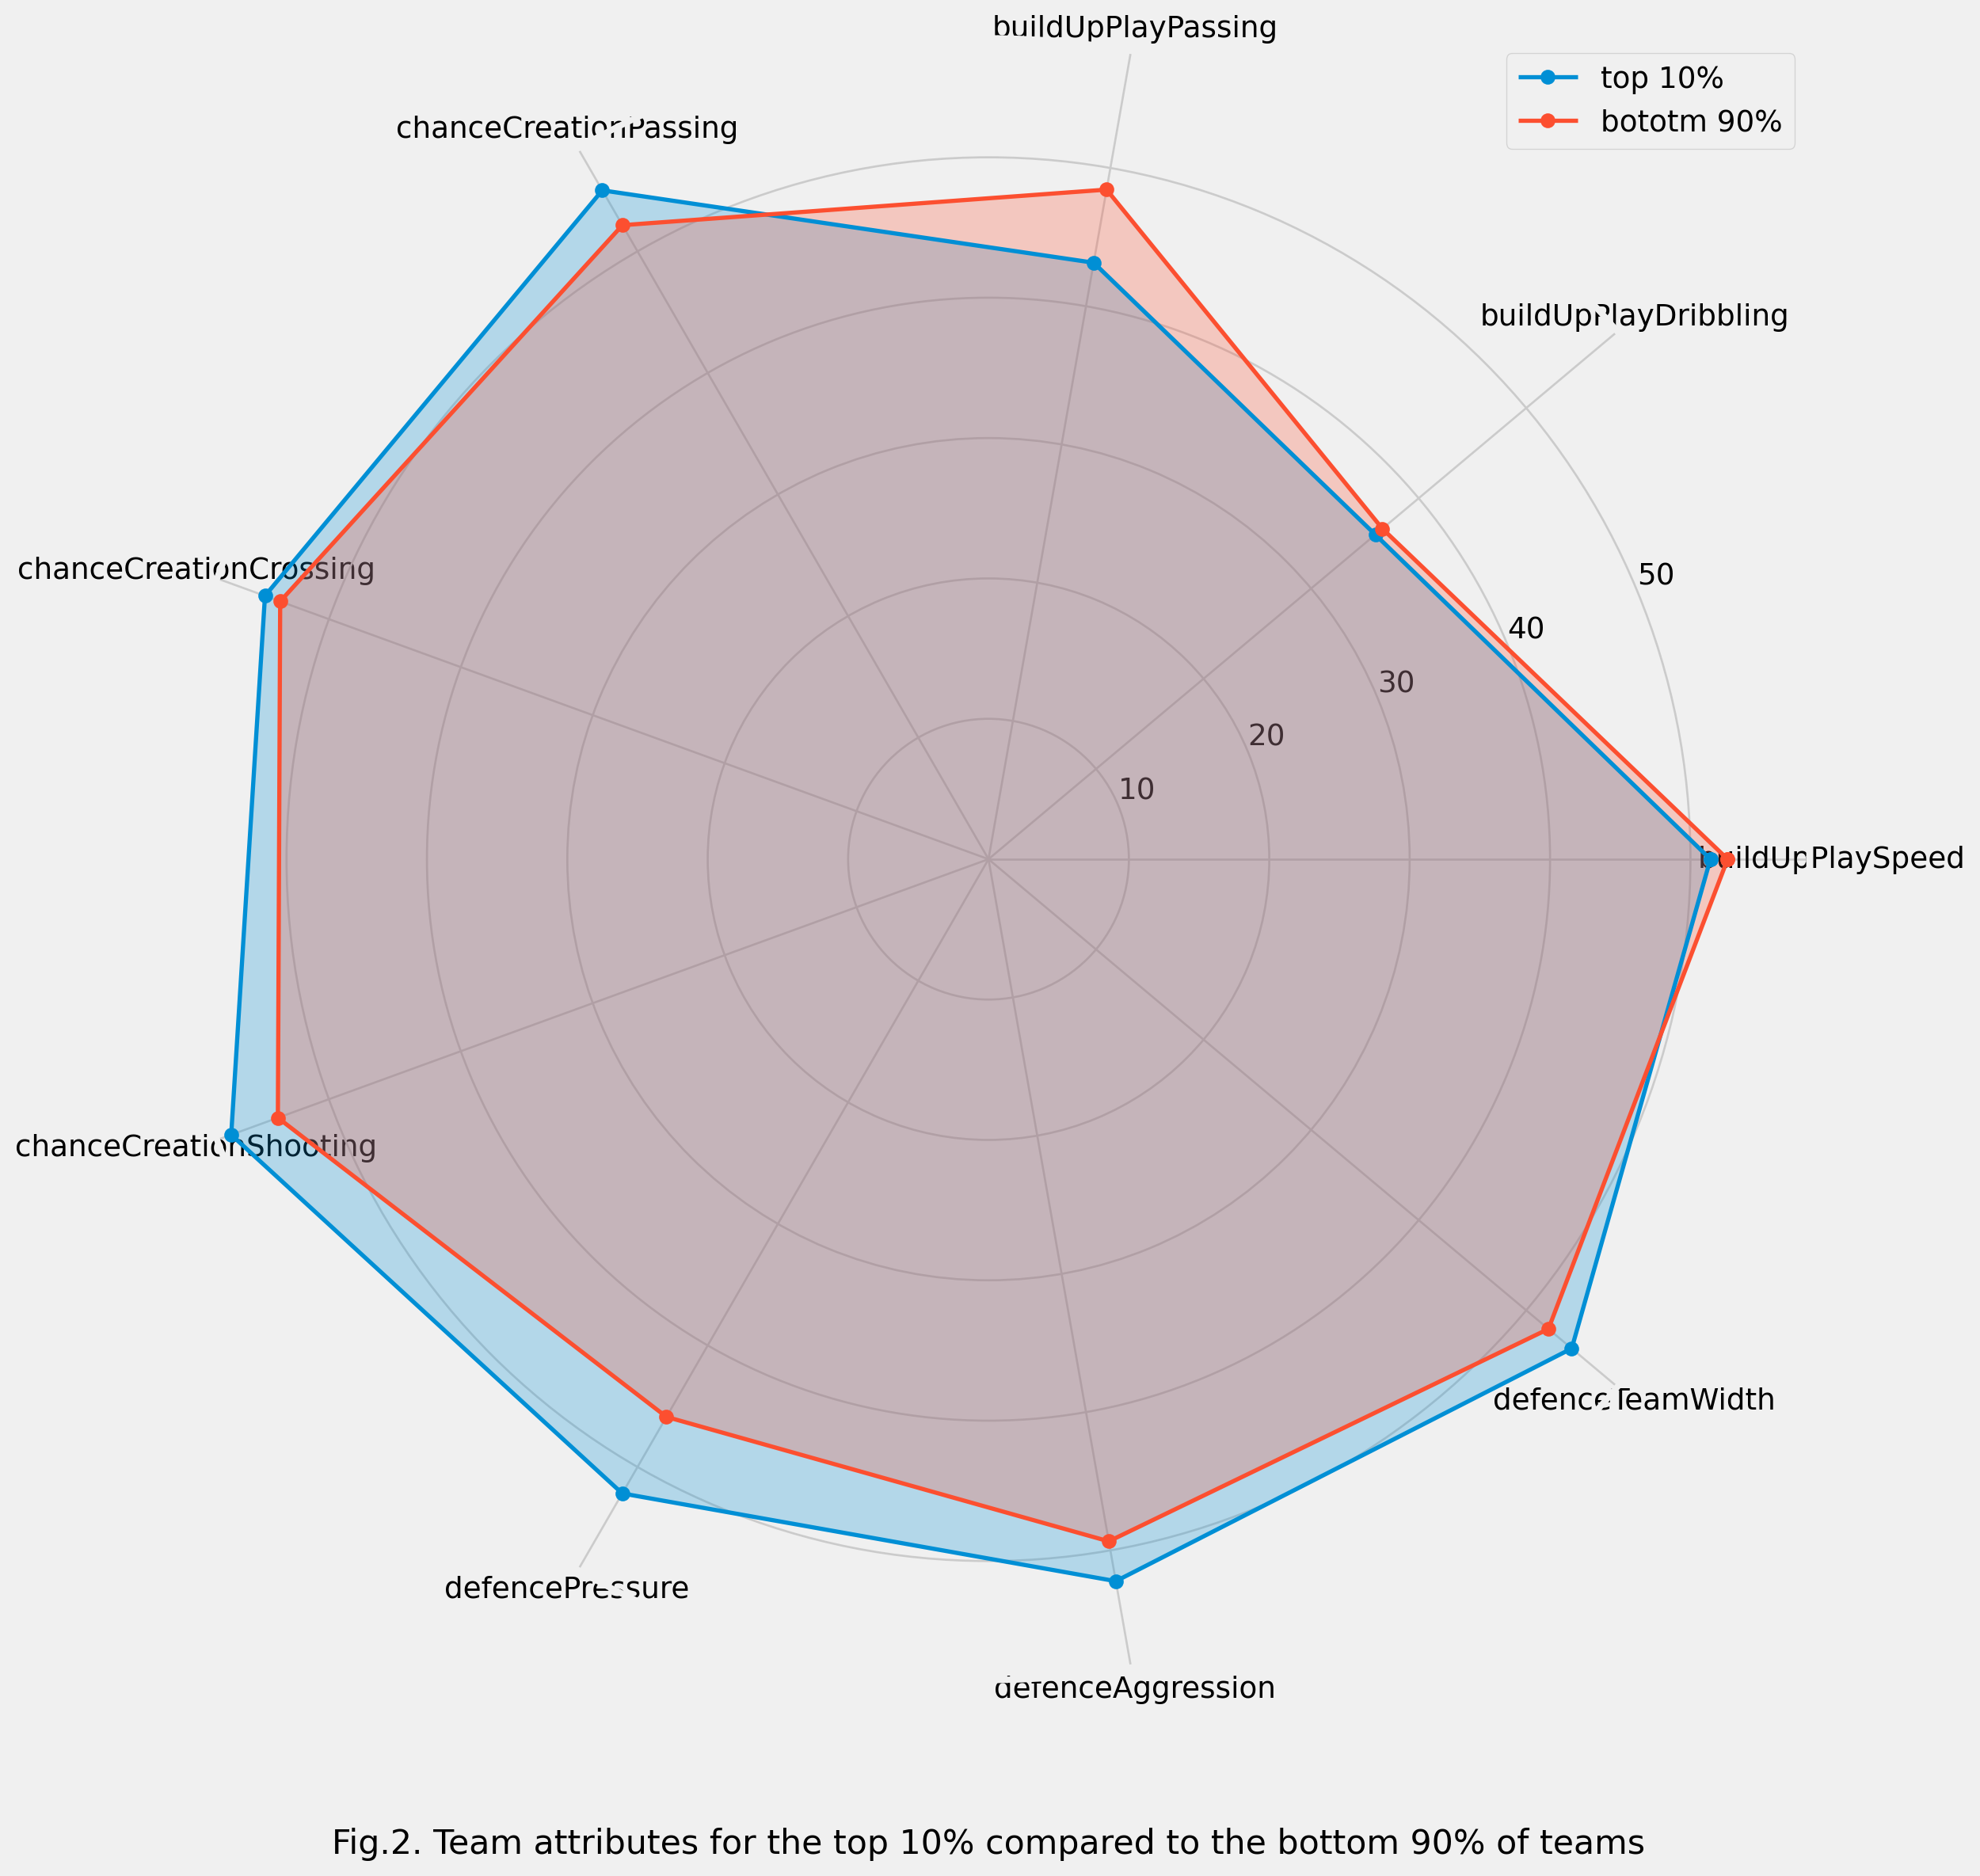

In [36]:
# Create labels from the column headers for our chart
labels = ['buildUpPlaySpeed',
          'buildUpPlayDribbling',
          'buildUpPlayPassing',
          'chanceCreationPassing',
          'chanceCreationCrossing',
          'chanceCreationShooting',
          'defencePressure',
          'defenceAggression',
          'defenceTeamWidth']

# Create the radar chart
stats10 = df_team_att_top10_means.values
stats90 = df_team_att_bottom90_means.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

# Close the plot
stats10 = np.concatenate((stats10, [stats10[0]]))
stats90 = np.concatenate((stats90, [stats90[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize = (13.33, 13.33), dpi=96)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats10, 'o-', linewidth=2, label='top 10%')
ax.fill(angles, stats10, alpha=0.25)
ax.plot(angles, stats90, 'o-', linewidth=2, label='bototm 90%')
ax.fill(angles, stats90, alpha=0.25)

ax.set_thetagrids(np.delete(angles,-1) * 180 / np.pi, labels)
ax.grid(True)
ax.legend(loc='best', fontsize=14)

# Add caption
fignum = 2
figtxt = '. Team attributes for the top 10% compared to the bottom 90% of teams'
figcap = 'Fig.' + str(fignum) + figtxt
ax.text(0.5, -0.1, figcap, fontsize=16, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-team-attributes-top10-bottom90.png', bbox_inches='tight')

plt.show;

Based on the radar graph, there appears to be a higher correlation between team effectiveness and the team attributes: chanceCreationShooting, defencePressure, and defenceAgression. Also, the team attributes for defenceTeadWidth and chanceCreationPassing seem to have a correlation to effectivenss of a team.

A negative correlation is visible in the team attribute buildUpPlayPassing. The top 10% of teams score significantly lower on this team attribute. The attribute of buildUpPlayPassing represents the passing distance between each player i.e. if you set this to 100 you
would want to play a long ball style. The negative correlation suggests that higher buildUpPlayPassing leads to more loss of ball possession and in turn leads to less effectiveness in terms of matches won.

Earlier we saw that the team of FC Porto season 2010/2011 (team_api_id 9773) was most the effective with 2.8 points per match. On the other hand, Team Willem II 2010/2011 (team_api_id 8525) was the least effective with just 0.441176 points per match. We expect to see the same above correlation for team attributes magnified, if the most effective team was compared to the least effective team.

### 3.3 How do player attributes differ for the most effective players compared to all of the other players in our dataset?

In [37]:
# Explore player attributes for the top 10% of teams
df_player_top10 = pd.merge(
    df_team_top10[['team_api_id', 'season']], df_players_team_season, 
    on = ['team_api_id', 'season'], how = 'left')
df_player_top10.tail()

,team_api_id,season,player
3353,10265,2009/2010,69554.0
3354,10265,2009/2010,72633.0
3355,10265,2009/2010,30976.0
3356,10265,2009/2010,30978.0
3357,10265,2009/2010,68766.0


In [38]:
# Adjust player attribute dataframe to merge 
df_player_att['date'] = pd.to_datetime(df_player_att['date'])
df_player_att['season'] = np.where(
    df_player_att['date'].dt.month > 6, 
    df_player_att['date'].dt.year.astype(str) + '/' 
    + (df_player_att['date'].dt.year + 1).astype(str),
    (df_player_att['date'].dt.year - 1).astype(str) + '/'
    + (df_player_att['date'].dt.year).astype(str))
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014/2015
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006/2007


In [39]:
# Merge with Player dataframe to get player height and weight
df_player_top10hw = pd.merge(
    df_player_top10, df_players[['player_api_id', 'height', 'weight']],
    how = 'left', left_on = ['player'], right_on = ['player_api_id'])

# Merge df_players_top10 and player attributes on player and season
df_player_att_top10 = pd.merge(
    df_player_top10hw, df_player_att, how = 'left', 
    left_on = ['player', 'season'], 
    right_on = ['player_api_id', 'season'])

df_player_att_top10.tail()

,team_api_id,season,player,player_api_id_x,height,weight,id,player_fifa_api_id,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
12611,10265,2009/2010,72633.0,72633,182.88,161,10638.0,184565.0,72633.0,2009-08-30,...,66.0,59.0,60.0,51.0,52.0,2.0,21.0,68.0,21.0,21.0
12612,10265,2009/2010,30976.0,30976,182.88,174,145154.0,148434.0,30976.0,2010-02-22,...,64.0,42.0,71.0,79.0,68.0,11.0,24.0,64.0,24.0,24.0
12613,10265,2009/2010,30978.0,30978,180.34,159,141297.0,105827.0,30978.0,2010-02-22,...,76.0,87.0,20.0,22.0,21.0,6.0,20.0,48.0,20.0,20.0
12614,10265,2009/2010,68766.0,68766,172.72,152,145717.0,176207.0,68766.0,2010-02-22,...,64.0,69.0,24.0,51.0,46.0,11.0,23.0,58.0,23.0,23.0
12615,10265,2009/2010,68766.0,68766,172.72,152,145718.0,176207.0,68766.0,2009-08-30,...,64.0,69.0,24.0,51.0,46.0,11.0,23.0,58.0,23.0,23.0


In [40]:
# Create a list of all column labels
labels = df_player_att_top10.columns.values

# Keep columns for player attributes, height and weight
columns_to_drop = labels[[0,1,2,3,6,7,8,9]]
df_player_att_top10 = df_player_att_top10.drop(columns = columns_to_drop)
df_player_att_top10.tail()

,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
12611,182.88,161,71.0,84.0,left,high,medium,73.0,67.0,68.0,...,66.0,59.0,60.0,51.0,52.0,2.0,21.0,68.0,21.0,21.0
12612,182.88,174,71.0,76.0,right,medium,high,36.0,51.0,67.0,...,64.0,42.0,71.0,79.0,68.0,11.0,24.0,64.0,24.0,24.0
12613,180.34,159,73.0,79.0,left,medium,low,69.0,83.0,59.0,...,76.0,87.0,20.0,22.0,21.0,6.0,20.0,48.0,20.0,20.0
12614,172.72,152,62.0,74.0,right,medium,low,51.0,62.0,54.0,...,64.0,69.0,24.0,51.0,46.0,11.0,23.0,58.0,23.0,23.0
12615,172.72,152,62.0,74.0,right,medium,low,51.0,62.0,54.0,...,64.0,69.0,24.0,51.0,46.0,11.0,23.0,58.0,23.0,23.0


In [41]:
# Calculate the mean player attributes for the top 10% of teams
df_player_att_top10_condensed = df_player_att_top10.mean()
df_player_att_top10_condensed

height                181.731202
weight                168.726617
overall_rating         75.868011
potential              80.163358
crossing               62.522554
finishing              56.420743
heading_accuracy       62.697665
short_passing          70.237452
volleys                56.980498
dribbling              67.555035
curve                  61.127119
free_kick_accuracy     55.418837
long_passing           64.750000
ball_control           71.410022
acceleration           72.403272
sprint_speed           72.883577
agility                70.749264
reactions              73.902319
balance                68.145109
shot_power             68.974031
jumping                69.867627
stamina                72.434006
strength               70.311865
long_shots             60.936706
aggression             65.704892
interceptions          58.460530
positioning            63.361102
vision                 65.871448
penalties              61.278510
marking                51.335848
standing_t

In [42]:
# Explore player attributes for the bottom 90% of teams
df_player_bottom90 = pd.merge(
    df_team_bottom90[['team_api_id', 'season']], df_players_team_season, 
    on = ['team_api_id', 'season'], how = 'left')
df_player_bottom90.tail()

,team_api_id,season,player
31639,274581,2015/2016,466623.0
31640,274581,2015/2016,574845.0
31641,274581,2015/2016,557042.0
31642,274581,2015/2016,409000.0
31643,274581,2015/2016,601304.0


In [43]:
# Merge with Player dataframe to get player height and weight
df_player_bottom90hw = pd.merge(
    df_player_bottom90, df_players[['player_api_id', 'height', 'weight']],
    how = 'left', left_on = ['player'], right_on = ['player_api_id'])

# Merge df_players_top10 and player attributes on player and season
df_player_att_bottom90 = pd.merge(
    df_player_bottom90hw, df_player_att, how = 'left', 
    left_on = ['player', 'season'], 
    right_on = ['player_api_id', 'season'])
df_player_att_bottom90.tail()

,team_api_id,season,player,player_api_id_x,height,weight,id,player_fifa_api_id,player_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
99318,274581,2015/2016,601304.0,601304,203.2,185,54708.0,226114.0,601304.0,2016-03-24,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99319,274581,2015/2016,601304.0,601304,203.2,185,54709.0,226114.0,601304.0,2016-01-28,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99320,274581,2015/2016,601304.0,601304,203.2,185,54710.0,226114.0,601304.0,2015-12-10,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99321,274581,2015/2016,601304.0,601304,203.2,185,54711.0,226114.0,601304.0,2015-11-12,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99322,274581,2015/2016,601304.0,601304,203.2,185,54712.0,226114.0,601304.0,2015-09-21,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0


In [44]:
# Create a list of all column labels
labels2 = df_player_att_bottom90.columns.values

# Keep columns for player attributes, height and weight
columns_to_drop2 = labels2[[0,1,2,3,6,7,8,9]]
df_player_att_bottom90 = df_player_att_bottom90.drop(
    columns = columns_to_drop2)
df_player_att_bottom90.tail()

,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
99318,203.2,185,58.0,66.0,right,medium,low,27.0,56.0,44.0,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99319,203.2,185,59.0,67.0,right,medium,low,27.0,56.0,44.0,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99320,203.2,185,59.0,67.0,right,medium,low,27.0,56.0,44.0,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99321,203.2,185,59.0,67.0,right,medium,medium,27.0,56.0,44.0,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0
99322,203.2,185,59.0,67.0,right,medium,medium,27.0,56.0,44.0,...,36.0,51.0,15.0,19.0,13.0,12.0,8.0,11.0,13.0,7.0


In [45]:
# Calculate the mean player attributes for the bottom 90% effective teams
df_player_att_bottom90_condensed = df_player_att_bottom90.mean()
df_player_att_bottom90_condensed

height                181.863238
weight                168.533683
overall_rating         69.704499
potential              74.194123
crossing               56.428215
finishing              50.615454
heading_accuracy       58.372224
short_passing          63.908215
volleys                50.092864
dribbling              60.573150
curve                  53.841062
free_kick_accuracy     49.939036
long_passing           58.365653
ball_control           64.754192
acceleration           68.256775
sprint_speed           68.695533
agility                66.476764
reactions              67.247344
balance                65.529121
shot_power             63.107574
jumping                67.448300
stamina                67.993662
strength               68.099821
long_shots             54.484671
aggression             62.198793
interceptions          52.974112
positioning            56.750200
vision                 58.592145
penalties              55.574151
marking                47.948922
standing_t

In [46]:
# Compare player attributes for top 10% and bottom 90%
d = {'top10': df_player_att_top10_condensed, 
     'bottom90': df_player_att_bottom90_condensed}
df_player_att_compared = pd.DataFrame(data = d)

# Calculate delta in percentage
df_player_att_compared['perc_diff'] = (
    abs(df_player_att_compared['top10'] 
     - df_player_att_compared['bottom90']) 
     / ((df_player_att_compared['top10']
        + df_player_att_compared['bottom90']) / 2)) * 100

df_player_att_compared = df_player_att_compared.sort_values(
    by = 'perc_diff', ascending = False).reset_index()
df_player_att_compared

,index,top10,bottom90,perc_diff
0,volleys,56.980498,50.092864,12.865261
1,curve,61.127119,53.841062,12.674911
2,vision,65.871448,58.592145,11.697079
3,long_shots,60.936706,54.484671,11.179966
4,positioning,63.361102,56.750200,11.007961
5,dribbling,67.555035,60.573150,10.898281
6,finishing,56.420743,50.615454,10.847339
7,free_kick_accuracy,55.418837,49.939036,10.402263
8,long_passing,64.750000,58.365653,10.371299
9,crossing,62.522554,56.428215,10.246826


In [ ]:
# Visualize the comaprison between top 10% to bottom 90% of 
# player attributes

df_player_att_compared = df_player_att_compared.sort_values(
    by = 'perc_diff', ascending = True).reset_index()
df_player_att_compared['positive'] = (
    df_player_att_compared['perc_diff'] > 10)

data = df_player_att_compared
group_data = df_player_att_compared['perc_diff']
group_names = df_player_att_compared['index']
order = df_player_att_compared.index.values

fig, ax = plt.subplots(figsize=(13.33, 13.33), dpi=96)
ax.barh(order, group_data, 
        color = df_player_att_compared.positive.map(
            {True: '#99CC99', False: '#F4874B'}))
ax.set_xlim([0, 15])
ax.set_yticklabels(labels = df_player_att_compared['index'])
ax.set_yticks(np.arange(0, 38, step=1))

ax.set_xlabel('Percent Difference of Top 10% to Bottom 90%', size=18, labelpad=14)
ax.set_ylabel('Player Attributes', size=18, labelpad=14)
ax.tick_params(axis='both', size=16)

# Add caption
fignum += 1
figtxt = '. Player Attributes, percent difference between top 10% and bottom 90% of teams'
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.1, figcap, fontsize=16, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-player-attributes-top10-bottom90.png', bbox_inches='tight')

plt.show();

Comparing player attributes for the top 10% of teams to the bottom 90% of teams shows that players in the top 10% of teams score higher on every player attribute (with 10 attributes having more than a 10% difference). The top 3 attributes players from top teams score the highest on are volleys, curve, and vision.

<a class="anchor" id="conclusion"></a>
# 4. Conclusion

Data wrangling, like most data analytics processes, is an iterative one – the practitioner will need to carry out the above steps repeatedly in order to produce the desired results. 
The project made use of the European Soccer Database on [Kaggle](https://www.kaggle.com/hugomathien/soccer). The database contains data on more than 25,000 matches for the 2008 to 2016 seasons, info on 10,000 players from 11 European Countries, players & team attributes sourced from the EA Sports' FIFA video game series, and detailed match events (e.g. goal types, possession, corner, cross, fouls, etc.). Data wrangling will help any analytical person quicken the process of decision making and get better insights in less time.

<a class="anchor" id="acknowledgments"></a>
### Acknowledgments 

The project was done as part of the Galvanize Data Science Immersive program.

The project referenced the following resources:
* https://medium.com/analytics-vidhya/introduction-to-data-wrangling-88c1b5e747cb
* https://www.springboard.com/blog/data-wrangling/
* *Hands-On Data Analysis with Pandas* by Packt Publishing, written by Stefanie Molin

---
<em>The Code Caviar</em> is a digital magazine about data science and analytics that dives deep into key topics, so you can experience the thrill of solving at scale. 